In [10]:
import numpy as np
import matplotlib.pyplot as plt

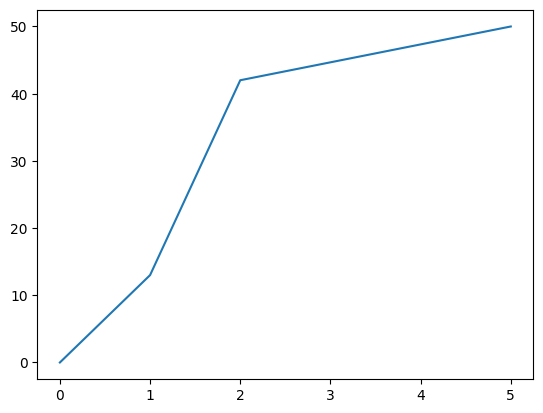

In [11]:
time = [0, 1, 2, 5]  # x
distance = [0, 13, 42, 50]  # y
_ = plt.plot(time, distance)

Slope and intercept are enough to uniquely identify every single possible line

By changing the slope and intercept values you can obtain all possible lines in universe

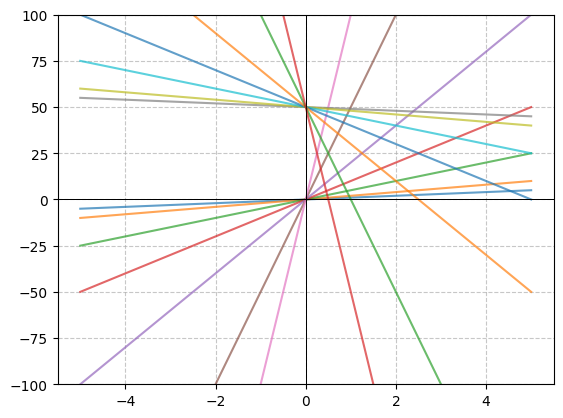

In [12]:
x = np.linspace(-5, 5, 100)

lines = [
    (1, 0),
    (2, 0),
    (5, 0),
    (10, 0),
    (20, 0),
    (50, 0),
    (100, 0),

    (-1, 50),
    (-2, 50),
    (-5, 50),
    (-10, 50),
    (-20, 50),
    (-50, 50),
    (-100, 50),
]

for slope, intercept in lines:
  y = slope * x + intercept
  _ = plt.plot(x, y, label=f"line: y = {slope} * x + {intercept}", alpha=0.7)
  _ = plt.axhline(0, color='black', linewidth=0.5)
  _ = plt.axvline(0, color='black', linewidth=0.5)
  _ = plt.grid(True, linestyle='--', alpha=0.7)
  _ = plt.ylim(-100, 100)
  # _ = plt.legend()

### Plot the bike journey data

In [13]:
time = np.array([0, 1, 2, 3, 4, 5, 6, 7])
distance = np.array([0, 35, 70, 85, 120, 150, 190, 250])

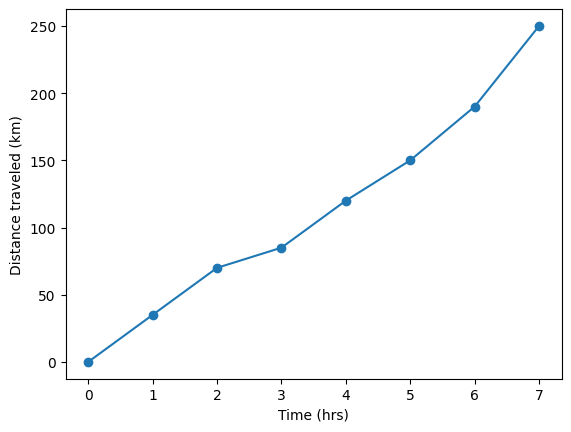

In [14]:
_ = plt.scatter(time, distance)
_ = plt.plot(time, distance)
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')

### Calculate a slope and intercept of every segment, and plot the line

For line segment b/w sample 0 and 1
  m=35.0, b=0.0
For line segment b/w sample 1 and 2
  m=35.0, b=0.0
For line segment b/w sample 2 and 3
  m=15.0, b=40.0
For line segment b/w sample 3 and 4
  m=35.0, b=-20.0
For line segment b/w sample 4 and 5
  m=30.0, b=0.0
For line segment b/w sample 5 and 6
  m=40.0, b=-50.0
For line segment b/w sample 6 and 7
  m=60.0, b=-170.0


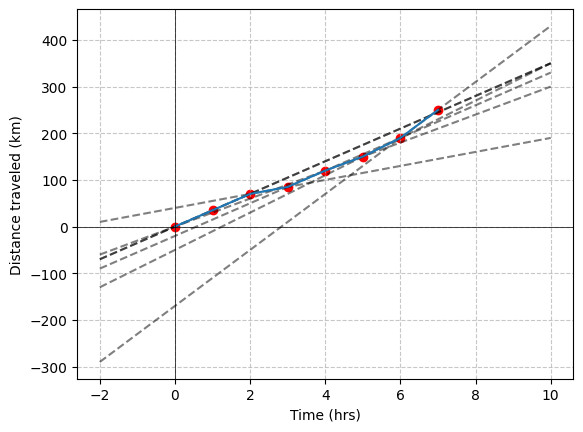

In [15]:
for i in range(len(time)-1):
  x1, y1 = time[i], distance[i]
  x2, y2 = time[i+1], distance[i+1]
  print(f'For line segment b/w sample {i} and {i+1}')

  slope = (y2 - y1) / (x2 - x1)
  intercept = y1 - (slope * x1)
  print(f'  m={slope}, b={intercept}')

  x = np.linspace(-2, 10, 100)
  y = slope * x + intercept
  _ = plt.plot(x, y, color='black', linestyle='--', alpha=0.5)

_ = plt.scatter(time, distance, color='red')
_ = plt.plot(time, distance)
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)
_ = plt.grid(True, linestyle='--', alpha=0.7)

### Using slope and intercept of segments make predictions for whole data

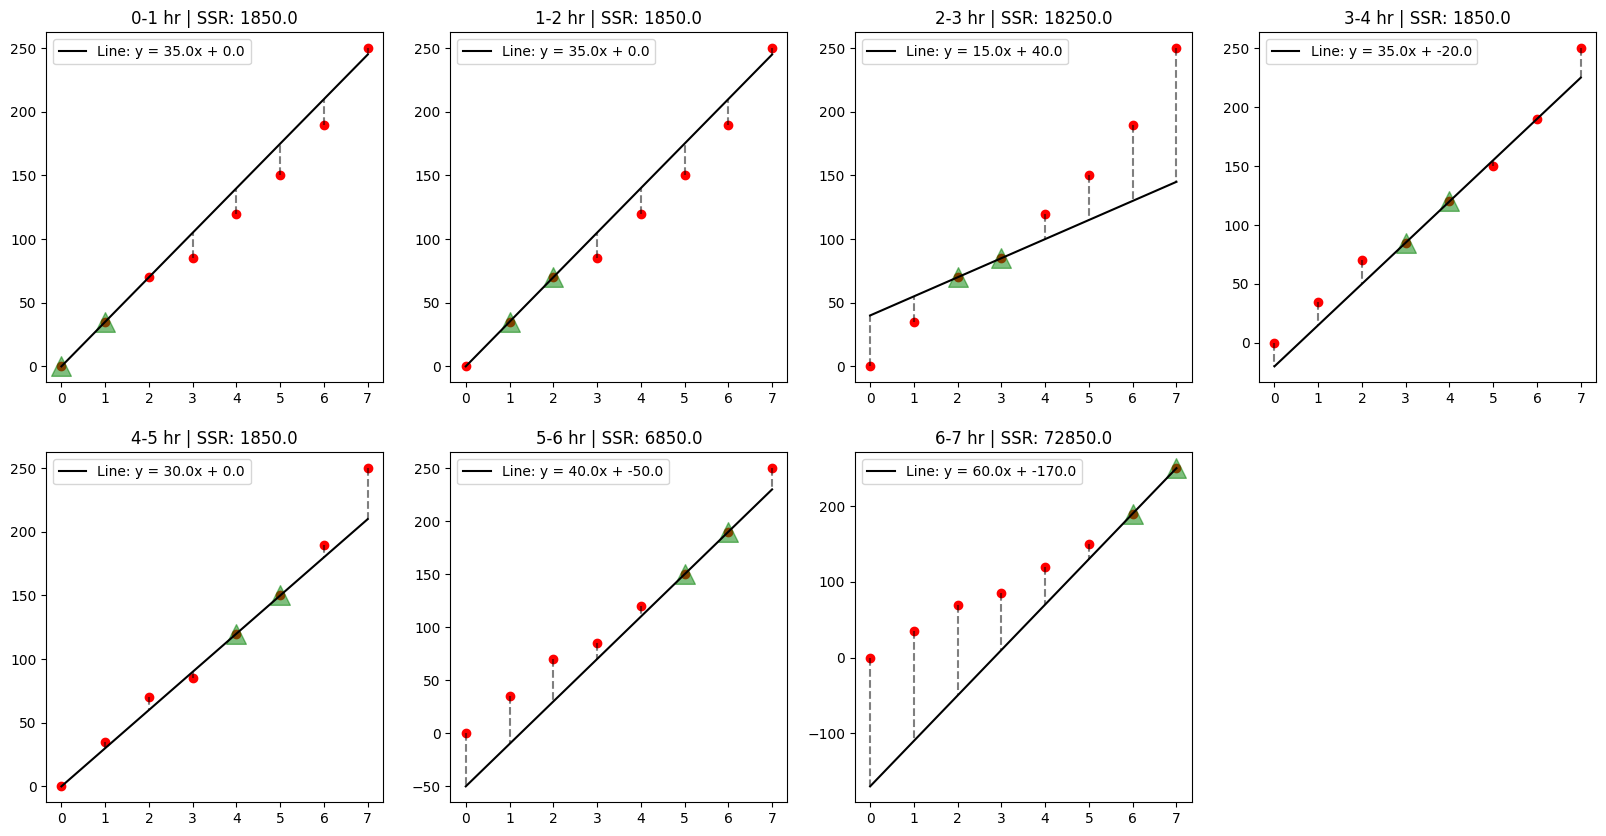

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i in range(len(time)-1):
  x1, y1 = time[i], distance[i]
  x2, y2 = time[i+1], distance[i+1]

  slope = (y2 - y1) / (x2 - x1)
  intercept = y1 - (slope * x1)

  distance_pred = slope * time + intercept
  ssr = ((distance - distance_pred) ** 2).sum()

  _ = axes[i].plot(time, distance_pred, color='black', label=f'Line: y = {slope}x + {intercept}')
  _ = axes[i].scatter(time, distance, color='red')
  _ = axes[i].scatter([x1, x2], [y1, y2], color='green', marker='^', s=200, alpha=0.5)
  _ = axes[i].vlines(time, distance, distance_pred, linestyle='--', color='black', alpha=0.5)
  _ = axes[i].set_title(f'{x1}-{x2} hr | SSR: {ssr}')
  _ = axes[i].legend()

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

### Find the best slope and intercept using OLS

In [17]:
x = time
y = distance

# m = sigma[(x-x')(y-y')] / sigma[(x-x')^2]
numerator = np.sum((x-x.mean())*(y-y.mean()))
denominator = np.sum((x-x.mean())**2)
m = numerator / denominator

# b = y' - mx'
b = y.mean() - m*x.mean()

y_pred = m*x + b
ssr = np.sum((y - y_pred)**2)

print(f'Slope={m:.2f}')
print(f'Intercept={b:.2f}')
print(f'SSR={ssr:.2f}')

Slope=33.33
Intercept=-4.17
SSR=933.33


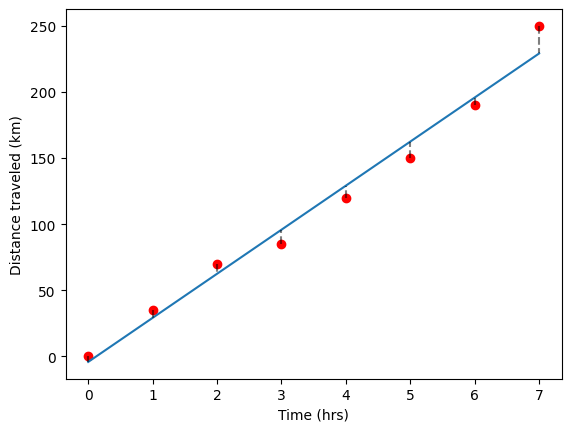

In [18]:
_ = plt.scatter(x, y, color='red')  # Data
_ = plt.plot(x, y_pred, label=f'Line: y = {m}x + {b}')  # Regression line
_ = plt.vlines(x, y, y_pred, linestyle='--', color='black', alpha=0.5)  # Residuals
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')